# Final Project-Natural Vibration of Cantilever Beam

### <p style="text-align: right;"> &#9989; Xiaocheng Sun</p>

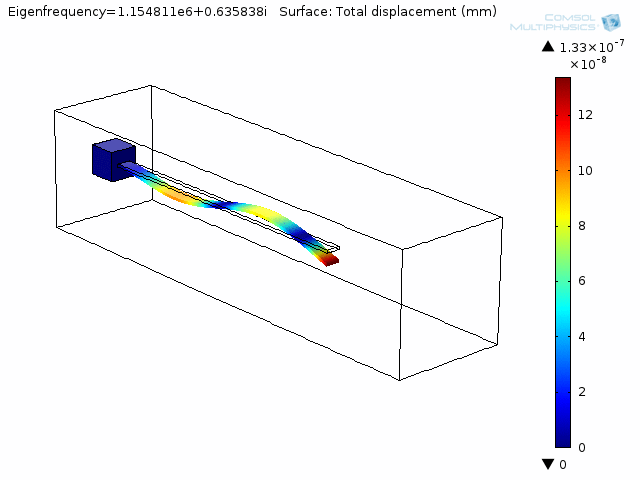

In [1]:
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def assemble(K,k,i,j):
    '''This function assemble the element matrix into the global one'''
    K[2*i-2,2*i-2] = K[2*i-2,2*i-2] +k[0,0]
    K[2*i-2,2*i-1] = K[2*i-2,2*i-1] +k[0,1]
    K[2*i-2,2*j-2] = K[2*i-2,2*j-2] +k[0,2]
    K[2*i-2,2*j-1] = K[2*i-2,2*j-1] +k[0,3]
    
    K[2*i-1,2*i-2] = K[2*i-1,2*i-2] +k[1,0]
    K[2*i-1,2*i-1] = K[2*i-1,2*i-1] +k[1,1]
    K[2*i-1,2*j-2] = K[2*i-1,2*j-2] +k[1,2]
    K[2*i-1,2*j-1] = K[2*i-1,2*j-1] +k[1,3]
    
    K[2*j-2,2*i-2] = K[2*j-2,2*i-2] +k[2,0]
    K[2*j-2,2*i-1] = K[2*j-2,2*i-1] +k[2,1]
    K[2*j-2,2*j-2] = K[2*j-2,2*j-2] +k[2,2]
    K[2*j-2,2*j-1] = K[2*j-2,2*j-1] +k[2,3]
    
    K[2*j-1,2*i-2] = K[2*j-1,2*i-2] +k[3,0]
    K[2*j-1,2*i-1] = K[2*j-1,2*i-1] +k[3,1]
    K[2*j-1,2*j-2] = K[2*j-1,2*j-2] +k[3,2]
    K[2*j-1,2*j-1] = K[2*j-1,2*j-1] +k[3,3]
    
    return K

### Finite element method for discretizing the special and time domain

In [3]:
ele = 4   #user defined the number of elements

In [4]:
#Finite element generation

#Material coefficients
L=1
h=L/ele
EI=1

#mass matirx and stiffness matrix
m1=[[156,22*h,54,-13*h],\
[22*h,4*h**2,13*h,-3*h**2],\
[54,13*h,156,-22*h],\
[-13*h,-3*h**2,-22*h,4*h**2]]
np.matrix(m1)
m1=np.dot(h/420,m1)

k=[[12,6*h,-12,6*h],
[6*h,4*h**2,-6*h,2*h**2],
[-12,-6*h,12,-6*h],
[6*h,2*h**2,-6*h,4*h**2]]
np.matrix(k)
k1=np.dot((EI/h**3),k1)

#initial the global matrix
M=np.zeros((2*ele+2,2*ele+2))
K=np.zeros((2*ele+2,2*ele+2))

#matrix assembling
for i in range(ele):
    M=assemble(M,m1,i+1,i+2)
    K=assemble(K,k1,i+1,i+2)
    
#eliminate the boundary conditions
Kb=K[2:10:1,2:10:1]
Mb=M[2:10:1,2:10:1]
    
#calculate the eigenvalue and eigenvector of Kb and Mb
eigvals, eigvecs = eigh(Kb,Mb, eigvals_only=False)
d1=eigvals[0:4]
v1=-eigvecs[:,0:4]

omega=d**0.5  #natural frequency
T=2*np.pi/omega

v_tran = np.matrix.transpose(v)

km=np.dot(v_tran,Kb)

ks=np.dot(km,v)

mm=np.dot(v_tran,Mb)
ms=np.dot(mm,v)

print("Number of element:{}, natural frequency is:{}".format(ele,omega))

Number of element:4, natural frequency is:[  3.51613027  22.06016631  62.17489253 122.6576394 ]


### Comparison with the analytical result:

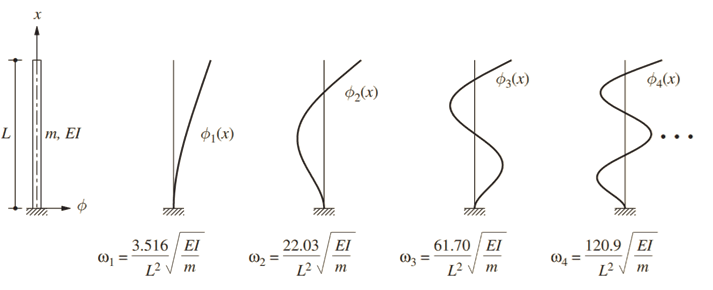

Some Notes:
* Analytical result cited from "Anil K. Chopra, Dynamic of Structures, 4th edition, page704, Fig. 17.3.2"
* All the material parameters are set to 1 in the code for carrying out the computation, therefore, the comparison is between the coefficient number.
* It can be seen above, the numerical result shows a decent agreement with the analytical one. 

### Newmark's scheme for integration:

In [5]:
#iteration using Newmark's scheme

ms_vector=np.diag(ms)
beta=1/6
gamma=2*beta
alpha=1/2

#time increament
delta_t=0.001    #time step
ti = 0  
tf = 0.1 
t = np.arange(ti,tf,delta_t)
nt = int(np.fix((tf-ti)/delta_t))

#boundary conditions
n=len(ms);
u=np.zeros((n,nt));
U=np.zeros((8,nt));
du=np.zeros((n,nt));
ddu=np.zeros((n,nt)); 


ddu[:,0]=1;    #to assume the initial acceleration
delta_Q=0;     #free vibration 

#newmark's coefficient
K_hat=ks+1/(beta*(delta_t)**2)*ms;
a=1/(beta*delta_t)*ms_vector;
b=1/(2*beta)*ms_vector;

a1=gamma/(beta*delta_t);
a2=gamma/beta;
a3=delta_t*(1-gamma/(2*beta));
a4=1/(beta*delta_t**2);
a5=1/(beta*delta_t);
a6=1/(2*beta);
print(u.shape)

#iteration
i=0
while i<nt-1:
    
    delta_Q_hat = delta_Q + a*du[:,i] + b*ddu[:,i]
    delta_u = np.dot(np.linalg.inv(K_hat),delta_Q_hat)
    delta_du = a1 * delta_u-a2 * du[:,i]+a3 * ddu[:,i]
    delta_ddu = a4*delta_u - a5 * du[:,i] - a6 * ddu[:,i]

    u[:,i+1]=u[:,i]+delta_u;
    du[:,i+1]=du[:,i]+delta_du;
    ddu[:,i+1]=ddu[:,i]+delta_ddu;
    i+=1
    
U=v@u

(4, 100)


### Displaying the result:

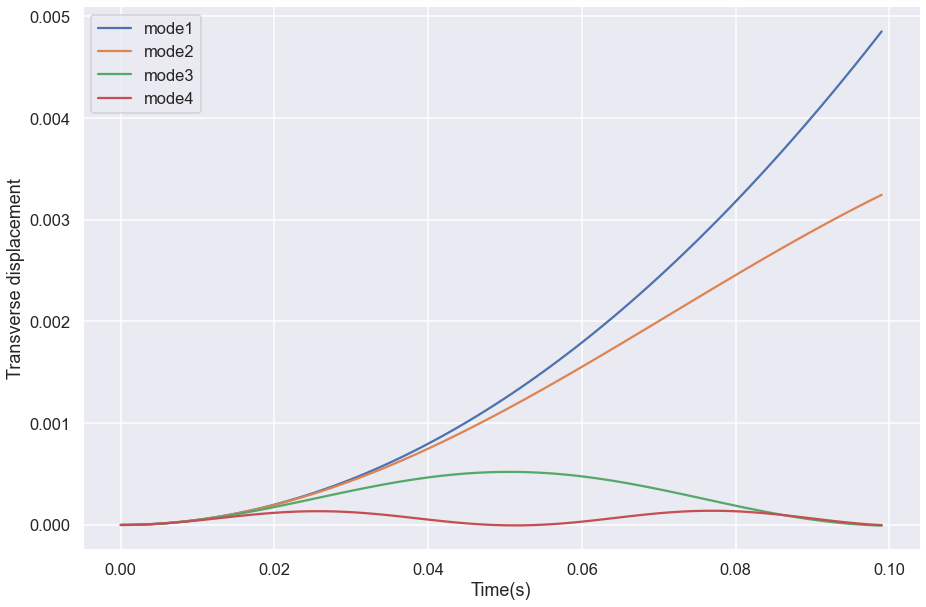

In [6]:
sns.set()
sns.set_context("talk")
plt.figure(figsize=(15,10))
plt.plot(t,u[0,:],label='mode1')
plt.plot(t,u[1,:],label='mode2')
plt.plot(t,u[2,:],label='mode3')
plt.plot(t,u[3,:],label='mode4')
plt.xlabel("Time(s)")
plt.ylabel("Transverse displacement")
plt.legend()
sns.despine()